<a href="https://colab.research.google.com/github/chmo-bu/Vocl/blob/AudioML/AudioML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tflite_model_maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 14.0 MB/s 
     |████████████████████████████████| 238 kB 60.7 MB/s 
     |████████████████████████████████| 10.9 MB 56.6 MB/s 
     |████████████████████████████████| 87 kB 8.5 MB/s 
     |████████████████████████████████| 60.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 68.8 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 128 kB 84.7 MB/s 
     |████████████████████████████████| 3.4 MB 63.6 MB/s 
     |████████████████████████████████| 1.1 MB 68.9 MB/s 
     |████████████████████████████████| 840 kB 30.3 MB/s 
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 497.9 MB 35 kB/s 
     |████████████████████████████████| 352 kB 80.2 MB/s 
     |████████████████████████████████| 1.4 MB 62.4 MB/s 
     |████████████████████████████

In [6]:
import tensorflow as tf
import tflite_model_maker as mm
from tflite_model_maker import audio_classifier
import os

import numpy as np
import random

from IPython.display import Audio, Image
from scipy.io import wavfile


import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import glob

print(f"TensorFlow Version: {tf.__version__}")
print(f"Model Maker Version: {mm.__version__}")

TensorFlow Version: 2.8.3
Model Maker Version: 0.4.2


In [3]:
birds_dataset_folder = tf.keras.utils.get_file('birds_dataset.zip',
                                                'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/birds_dataset.zip',
                                                cache_dir='./',
                                                cache_subdir='dataset',
                                                extract=True)

343695360/343680986 [==============================] - 9s 0us/step


In [7]:
data_dir = './dataset/small_birds_dataset'

bird_code_to_name = {
  'wbwwre1': 'White-breasted Wood-Wren',
  'houspa': 'House Sparrow',
  'redcro': 'Red Crossbill',  
  'chcant2': 'Chestnut-crowned Antpitta',
  'azaspi1': "Azara's Spinetail",   
}

birds_images = {
  'wbwwre1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg/640px-Henicorhina_leucosticta_%28Cucarachero_pechiblanco%29_-_Juvenil_%2814037225664%29.jpg', #   Alejandro Bayer Tamayo from Armenia, Colombia 
  'houspa': 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/House_Sparrow%2C_England_-_May_09.jpg/571px-House_Sparrow%2C_England_-_May_09.jpg', #    Diliff
  'redcro': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Red_Crossbills_%28Male%29.jpg/640px-Red_Crossbills_%28Male%29.jpg', #  Elaine R. Wilson, www.naturespicsonline.com
  'chcant2': 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Chestnut-crowned_antpitta_%2846933264335%29.jpg/640px-Chestnut-crowned_antpitta_%2846933264335%29.jpg', #   Mike's Birds from Riverside, CA, US
  'azaspi1': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Synallaxis_azarae_76608368.jpg/640px-Synallaxis_azarae_76608368.jpg', # https://www.inaturalist.org/photos/76608368
}

test_files = os.path.abspath(os.path.join(data_dir, 'test/*/*.wav'))

def get_random_audio_file():
  test_list = glob.glob(test_files)
  random_audio_path = random.choice(test_list)
  return random_audio_path


def show_bird_data(audio_path):
  sample_rate, audio_data = wavfile.read(audio_path, 'rb')

  bird_code = audio_path.split('/')[-2]
  print(f'Bird name: {bird_code_to_name[bird_code]}')
  print(f'Bird code: {bird_code}')
  display(Image(birds_images[bird_code]))

  plttitle = f'{bird_code_to_name[bird_code]} ({bird_code})'
  plt.title(plttitle)
  plt.plot(audio_data)
  display(Audio(audio_data, rate=sample_rate))

print('functions and data structures created')

functions and data structures created


Bird name: House Sparrow
Bird code: houspa


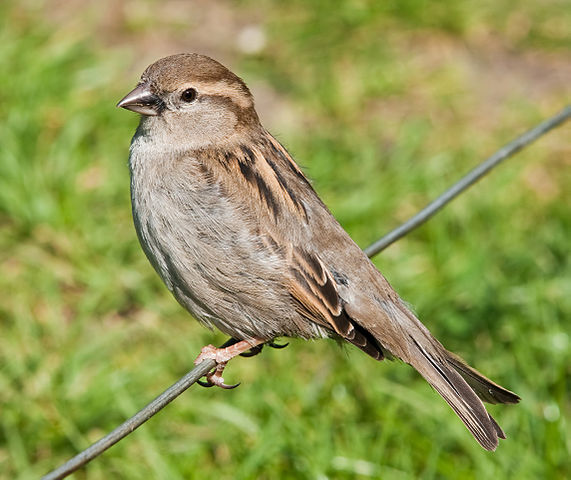

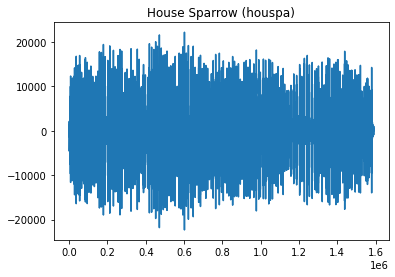

In [8]:
random_audio = get_random_audio_file()
show_bird_data(random_audio)

In [9]:
spec = audio_classifier.YamNetSpec(
    keep_yamnet_and_custom_heads=True,
    frame_step=3 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH,
    frame_length=6 * audio_classifier.YamNetSpec.EXPECTED_WAVEFORM_LENGTH)

In [10]:
train_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'train'), cache=True)
train_data, validation_data = train_data.split(0.8)
test_data = audio_classifier.DataLoader.from_folder(
    spec, os.path.join(data_dir, 'test'), cache=True)

In [11]:
batch_size = 128
epochs = 100

print('Training the model')
model = audio_classifier.create(
    train_data,
    spec,
    validation_data,
    batch_size=batch_size,
    epochs=epochs)

Training the model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 classification_head (Dense)  (None, 5)                5125      
                                                                 
Total params: 5,125
Trainable params: 5,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 202s 9s/step - loss: 1.5424 - acc: 0.3133 - val_loss: 1.4488 - val_acc: 0.3827
Epoch 2/100
22/22 [==============================] - 1s 29ms/step - loss: 1.3001 - acc: 0.4901 - val_loss: 1.3025 - val_acc: 0.4719
Epoch 3/100
22/22 [==============================] - 1s 33ms/step - loss: 1.1433 - acc: 0.5990 - val_loss: 1.1768 - val_acc: 0.5784
Epoch 4/100
22/22 [==============================] - 1s 29ms/step - loss: 1.0495 - acc: 0.6525 - val_loss: 1.1043 - val_acc: 0.6144
Epoch 5/100
22/22 [================

In [12]:
print('Evaluating the model')
model.evaluate(test_data)

Evaluating the model
28/28 [==============================] - 52s 2s/step - loss: 0.7595 - acc: 0.8060


[0.759525716304779, 0.8059701323509216]

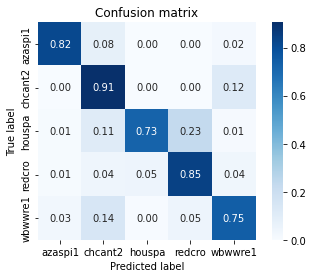

In [13]:
def show_confusion_matrix(confusion, test_labels):
  """Compute confusion matrix and normalize."""
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = test_labels
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

confusion_matrix = model.confusion_matrix(test_data)
show_confusion_matrix(confusion_matrix.numpy(), test_data.index_to_label)

In [14]:
serving_model = model.create_serving_model()

print(f'Model\'s input shape and type: {serving_model.inputs}')
print(f'Model\'s output shape and type: {serving_model.outputs}')

Model's input shape and type: [<KerasTensor: shape=(None, 15600) dtype=float32 (created by layer 'audio')>]
Model's output shape and type: [<KerasTensor: shape=(None, 521) dtype=float32 (created by layer 'keras_layer')>, <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'sequential')>]


In [15]:
sample_rate, audio_data = wavfile.read(random_audio, 'rb')

audio_data = np.array(audio_data) / tf.int16.max
input_size = serving_model.input_shape[1]

splitted_audio_data = tf.signal.frame(audio_data, input_size, input_size, pad_end=True, pad_value=0)

print(f'Test audio path: {random_audio}')
print(f'Original size of the audio data: {len(audio_data)}')
print(f'Number of windows for inference: {len(splitted_audio_data)}')

Test audio path: /content/dataset/small_birds_dataset/test/houspa/XC570604.wav
Original size of the audio data: 1589248
Number of windows for inference: 102


In [16]:
print(random_audio)

results = []
print('Result of the window ith:  your model class -> score,  (spec class -> score)')
for i, data in enumerate(splitted_audio_data):
  yamnet_output, inference = serving_model(data)
  results.append(inference[0].numpy())
  result_index = tf.argmax(inference[0])
  spec_result_index = tf.argmax(yamnet_output[0])
  t = spec._yamnet_labels()[spec_result_index]
  result_str = f'Result of the window {i}: ' \
  f'\t{test_data.index_to_label[result_index]} -> {inference[0][result_index].numpy():.3f}, ' \
  f'\t({spec._yamnet_labels()[spec_result_index]} -> {yamnet_output[0][spec_result_index]:.3f})'
  print(result_str)


results_np = np.array(results)
mean_results = results_np.mean(axis=0)
result_index = mean_results.argmax()
print(f'Mean result: {test_data.index_to_label[result_index]} -> {mean_results[result_index]}')

/content/dataset/small_birds_dataset/test/houspa/XC570604.wav
Result of the window ith:  your model class -> score,  (spec class -> score)
Result of the window 0: 	houspa -> 0.655, 	(Bird -> 0.762)
Result of the window 1: 	houspa -> 0.910, 	(Wild animals -> 0.803)
Result of the window 2: 	houspa -> 1.000, 	(Bird -> 0.974)
Result of the window 3: 	houspa -> 0.572, 	(Bird vocalization, bird call, bird song -> 0.662)
Result of the window 4: 	houspa -> 0.989, 	(Wild animals -> 0.801)
Result of the window 5: 	houspa -> 0.971, 	(Bird -> 0.914)
Result of the window 6: 	houspa -> 0.983, 	(Bird -> 0.926)
Result of the window 7: 	houspa -> 0.994, 	(Animal -> 0.949)
Result of the window 8: 	houspa -> 0.938, 	(Wild animals -> 0.898)
Result of the window 9: 	redcro -> 0.536, 	(Wild animals -> 0.640)
Result of the window 10: 	houspa -> 0.998, 	(Animal -> 0.989)
Result of the window 11: 	houspa -> 0.811, 	(Bird vocalization, bird call, bird song -> 0.663)
Result of the window 12: 	houspa -> 1.000, 	(